# Endoscapes2023 quick inspection (Detection + CVS)
This notebook only does sanity checks: load 1 image + show boxes, and print CVS labels.



In [1]:
import os
from pathlib import Path
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pycocotools.coco import COCO

DATA_ROOT = Path(r"C:\Users\TUF\COMP0220_Deep_Learning\coursework\endoscapes")  # <-- your path
SPLIT = "train"  # train/val/test
ANN = "annotation_coco.json"
META = "all_metadata.csv"

split_dir = DATA_ROOT / SPLIT
ann_path = split_dir / ANN
meta_path = DATA_ROOT / META

print("split_dir:", split_dir)
print("ann exists:", ann_path.exists(), ann_path)
print("meta exists:", meta_path.exists(), meta_path)

# Helpful: list a few files so you can see if jpg/png and what annotation files exist
print("\nSome files in split folder:")
for p in list(split_dir.iterdir())[:15]:
    print(" -", p.name)

split_dir: C:\Users\TUF\COMP0220_Deep_Learning\coursework\endoscapes\train
ann exists: True C:\Users\TUF\COMP0220_Deep_Learning\coursework\endoscapes\train\annotation_coco.json
meta exists: True C:\Users\TUF\COMP0220_Deep_Learning\coursework\endoscapes\all_metadata.csv

Some files in split folder:
 - 100_27200.jpg
 - 100_27225.jpg
 - 100_27250.jpg
 - 100_27275.jpg
 - 100_27300.jpg
 - 100_27325.jpg
 - 100_27350.jpg
 - 100_27375.jpg
 - 100_27400.jpg
 - 100_27425.jpg
 - 100_27450.jpg
 - 100_27475.jpg
 - 100_27500.jpg
 - 100_27525.jpg
 - 100_27550.jpg


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


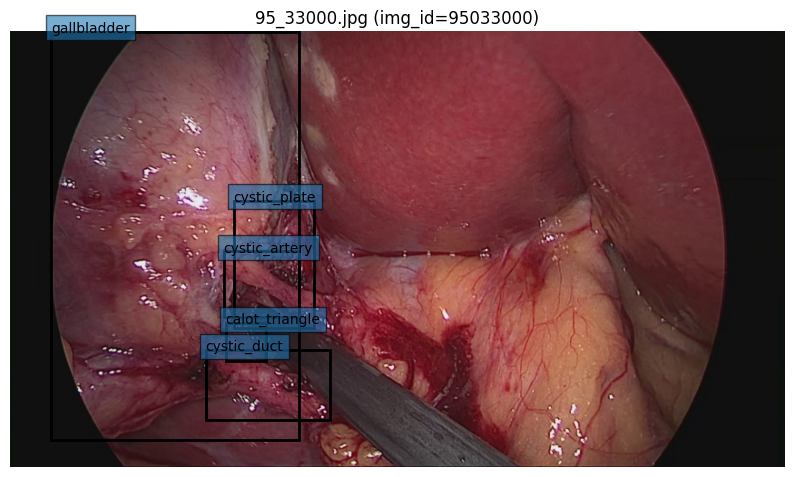

In [2]:
coco = COCO(str(ann_path))
img_ids = coco.getImgIds()
img_id = random.choice(img_ids)
info = coco.loadImgs([img_id])[0]
img = Image.open(split_dir / info["file_name"]).convert("RGB")

ann_ids = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco.loadAnns(ann_ids)
cats = {c["id"]: c["name"] for c in coco.loadCats(coco.getCatIds())}

plt.figure(figsize=(10, 6))
plt.imshow(img)
ax = plt.gca()
for a in anns:
    x, y, w, h = a["bbox"]
    rect = plt.Rectangle((x, y), w, h, fill=False, linewidth=2)
    ax.add_patch(rect)
    ax.text(x, y, cats.get(a["category_id"], str(a["category_id"])),
            fontsize=10, bbox=dict(alpha=0.6))
plt.title(f"{info['file_name']} (img_id={img_id})")
plt.axis("off")
plt.show()

In [3]:
df = pd.read_csv(meta_path)
print("CSV columns:", list(df.columns))

# find filename column
filename_col = None
for c in df.columns:
    if c.lower() in ["file_name", "filename", "frame", "image", "img"]:
        filename_col = c
        break
if filename_col is None:
    for c in df.columns:
        if any(x in c.lower() for x in ["file", "name", "frame"]):
            filename_col = c
            break
print("filename_col:", filename_col)

def pick(tok):
    for c in df.columns:
        if tok == c.lower():
            return c
    for c in df.columns:
        if tok in c.lower():
            return c
    return None

c1, c2, c3 = pick("c1"), pick("c2"), pick("c3")
print("cvs cols guess:", c1, c2, c3)

existing = set(p.name for p in split_dir.glob("*.jpg"))
sub = df[df[filename_col].astype(str).isin(existing)]
print("rows matching split images:", len(sub))

sub[[filename_col, c1, c2, c3]].head(10)

CSV columns: ['vid', 'frame', 'avg_cvs', 'C1', 'C2', 'C3', 'is_ds_keyframe', 'cvs_annotator_1', 'cvs_annotator_2', 'cvs_annotator_3', 'mask_path', 'label_path']
filename_col: frame
cvs cols guess: C1 C2 C3
rows matching split images: 0


,frame,C1,C2,C3
